
# k-Nearest Neighbors (K-NN)

KNN é um algoritmo simples de classificação supervisionada que podemos usar para atribuir uma classe a um novo dado.


### **Como ele funciona?**
O KNN é simples, pense que você tem dados, que são reperesentados como:
*  triângulos verdes
*  estrelas vermelhas

Existe um dado desconhecido, no qual você não sabe se é um triângulo verde ou estrela vermelha, mas tem disponível todos os dados sobre ela,  como é visto na imagem abaixo .




![alt text](https://cdn-images-1.medium.com/max/800/0*uNbO79MrS7jvY4qp.png)

Observando está imagem acima percebemos que é simples classifica-ló, pois está mais próximo da estrela vermelha, mas se olharmos a próxima imagem abaixo:


![alt text](https://miro.medium.com/max/405/1*0Pqqx6wGDfFm_7GLebg2Hw.png)

Percebemos que está não é tão fácil classifica-la como a imagem anterior, então neste tipo problema utilizaremos o k-nn, para poder classificar de acordo com as informações fornecidas.



## **As etapas do algoritmo KNN são:**

1 — Recebe um dado não classificado;

2 — Obter os k(parâmetro K) de menores distâncias;
 
3 — Medir a distância, que pode ser utilizada uma destas distâncias seja ela Euclidiana, Manhattan, Minkowski ou Ponderada,assim o novo dado como todos os outros dados que já estão classificados, pode ser classificado também;


4 — Verifica a classe de cada da um dos dados, que tiveram a menor distância e contar a quantidade de cada classe que aparece;

5 — Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;

6 — Classificar o novo dado com a classe tomada como resultado da classificação.

## **O que é o K, então?**

O k é um número que podemos determinar para verificarmos quais os k elementos que estão mais próximos.No entanto, para escolher o k os valores ímpares, são mais viáveis, pois identificou-se melhores resultados, evitando que ocorram empates. Existe algoritmos para melhor escolha do k, mas não será utilizado neste notebook.

Por exemplo, se k = 3 e 2 dos pontos forem 'verdes' e 1 forem 'vermelhos', o ponto de dados em questão seria rotulado de 'verde', pois 'verde' é a maioria (como mostrado na imagem acima) )

##  **Objetivo**

É implementar o algoritmo K-NN, sem a utilização da biblioteca Python Sklearn, na qual o algoritmo já esta implementado. Com isso, aplicar os conceitos desenvolvidos a partir das pesquisas feitas sobre o algoritmo.
Ao decorrer deste Notebook, mostrarei a linha de raciocínio na qual foi desenvolvido o algoritmo.






Importando as bibliotecas

In [0]:
import pandas as pd
import math as m
import numpy as np
import seaborn as sb

## DataSet
O DataSet que será utilizado é o conjuntos de dados consistem em três tipos diferentes de íris (Setosa, Versicolour e Virginica), comprimento da pétala e da sépala.

As linhas são as amostras e as colunas são: Comprimento da sépala, Largura da sépala, Comprimento da pétala e Largura da pétala.

## Leitura do arquivo utilizando a biblioteca Pandas

Criação do DataFrame data

In [0]:
data = pd.read_csv("iris.csv")

## Para uma melhor visualização do comportamento das classes, vamos utlizar a biblioteca Seaborn, que é uma biblioteca de visualização.

Perceba na imagem abaixo, que uma classe está visualmente classificável que é a Iris-Setosa, mas as outras duas não é possível visualmente. 

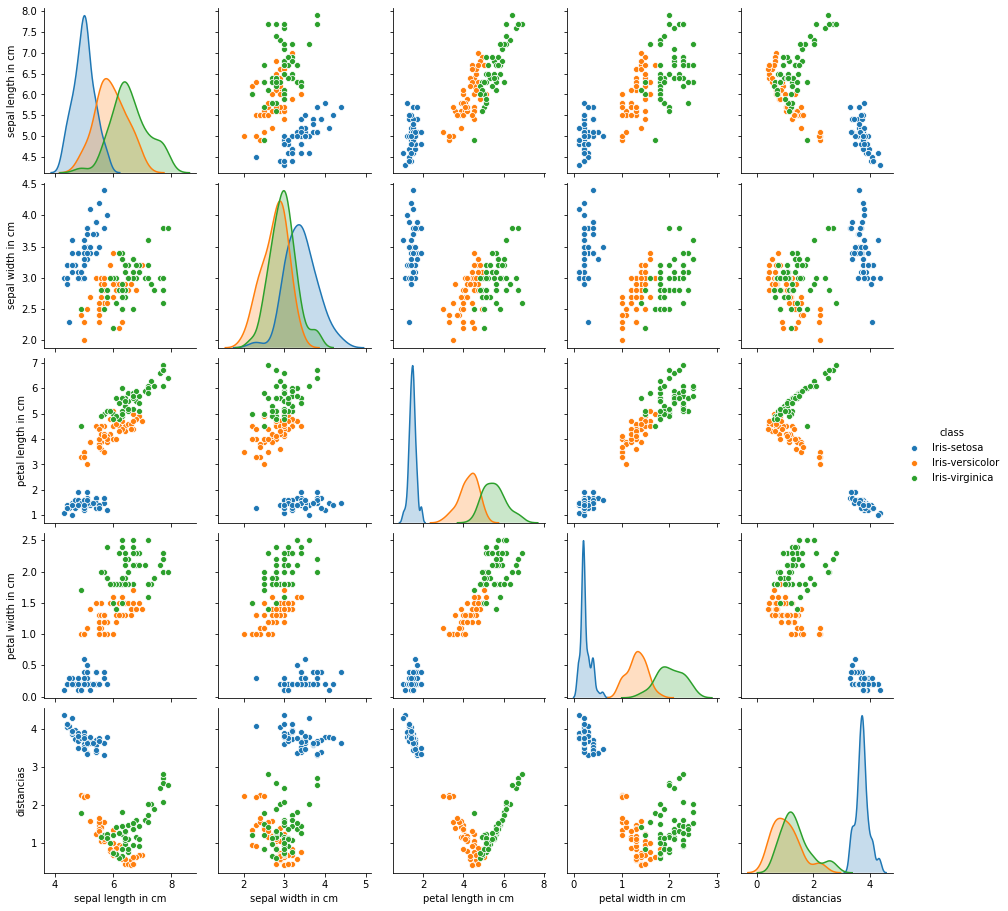

In [0]:
sb.pairplot(data, hue='class')

Visualização das 5 primeiras linhas do DataFrame, utilizando o Pandas.

In [23]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Implementação



Basicamente será separados  os dados das colunas que são elas: Comprimento da sépala, Largura da sépala, Comprimento da pétala e Largura da pétala. Assim, serão armazenados cada coluna em uma determinada lista com seus respectivos valores.

In [0]:
sepal_lenght = data["sepal length in cm"]
sepal_width = data["sepal width in cm"]
petal_lenght = data["petal length in cm"]
petal_width = data["petal width in cm"]

### Escolha do **K**

Escolhendo o k, como existe 150 linhas vou escolher o **k=101**, porque inclui pelo menos duas classes.

In [25]:
data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [0]:
k=101

### Dados para a classificação

Esses dados foram retirados do DataFrame, pois eles já estão classificados, ficando mais fácil para correção. 

Criando uma lista com os valores

In [0]:
#Versicolor
#dados_entrada = [6.6,	3.0	,4.4,	1.8	]	

# Setosa
dados_entrada = [5.1,3.5,1.4,0.2]

#Virginica
#dados_entrada = [6.2,	3.4,	5.4	,2.3]


### Cálculo da Distância

A distância que vai ser utilizada é a Euclediana.
Distância euclidiana é a distância entre dois pontos. 

![alt text](https://matematicahistoria.files.wordpress.com/2017/11/capture-20171127-170402.png?w=840)


Calcular a distância da lista do dados de entradas, com cada elemento de cada coluna que estão em suas respectivas listas.

Ex.: Fazendo o cálculo com a primeira linha do DataFrame

Lista com todos elementos para ser classificados:

data_entrada[0] = 5.1

data_entrada[1] = 3.5

data_entrada[2] = 1.4

data_entrada[3] = 0.2

Pegando a primeira linha do DataFrame, que corresponde a primeiro elemento das listas que contém as informações de cada coluna.

sepal_lenght[0] = 5.1	

sepal_width[0]  = 3.5	

petal_lenght[0] = 1.4	

petal_width[0]  = 0.2

Substituindo os valores na formula:

distancia = $\sqrt[2]{(data_entrada[0] - sepal_lenght[0] )²+ (data_entrada[1]-sepal_width[0])²+(data_entrada[2]-petal_lenght[0])²+(data_entrada[3]-petal_width[0])²}$

distancia = $\sqrt[2]{(5,1 - 5,1 )²+ (3.5 - 3.5)²+(1.4 - 1.4)²+(0.2 - 0.2)²}$

distancia = 0


Após terminar o cálculo é adicionado esse valor em uma lista, que no final estará com todos as distâncias. Este cálculo acima é repetido com todas as os outras linhas do DataFrame. 

O código abaixo, foi utlizado a biblioteca Math , para cálculo da raiz e da potência. 

In [0]:
distancias = []
aux = 0

for i in range(len(sepal_lenght)):
  sepal_l = m.pow((dados_entrada[0]-sepal_lenght[i]),2)
  sepal_w = m.pow((dados_entrada[1]-sepal_width[i]),2)
  petal_l = m.pow((dados_entrada[2]-petal_lenght[i]),2)
  petal_w = m.pow((dados_entrada[3]-petal_width[i]),2)
  aux = m.sqrt(sepal_l+sepal_w+ petal_l+petal_w)

  distancias.append(aux)

### Criando uma nova coluna no DataFrame com as distâncias:



In [0]:
data["distancias"] = distancias

### Classificando os dados

Para classificar foram utilizados alguns passos:



1.   Ordenar os valores da nova coluna **distancias**, utilizando uma função <code>sort_values()</code>  da biblioteca Pandas, ele vai ordenar do menor para o maior. 
2.   Salvar em um novo DataFrame com os dados ordenados
3.   Salvar novamente, só que dessa vez, só **K** menores dados,sendo os primeiros do DataFrame, logo os que serão analisados.

In [30]:
data1 = data.sort_values(by="distancias")
data1 = data1.head(k)
data1.head(k)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,distancias
0,5.1,3.5,1.4,0.2,Iris-setosa,0.000000
17,5.1,3.5,1.4,0.3,Iris-setosa,0.100000
4,5.0,3.6,1.4,0.2,Iris-setosa,0.141421
39,5.1,3.4,1.5,0.2,Iris-setosa,0.141421
27,5.2,3.5,1.5,0.2,Iris-setosa,0.141421
...,...,...,...,...,...,...
126,6.2,2.8,4.8,1.8,Iris-virginica,3.977436
50,7.0,3.2,4.7,1.4,Iris-versicolor,4.003748
127,6.1,3.0,4.9,1.8,Iris-virginica,4.007493
121,5.6,2.8,4.9,2.0,Iris-virginica,4.028647


Criando uma lista com todos os valores da coluna **class** do novo DataFrame criado só com as distâncias mais próximas.
Ocorre que os dados estão salvos na lista como Series da biblioteca pandas, então eu pego só valores da lista, e armazeno em uma nova lista.

In [0]:
lista = data1['class']
array = lista.values

O algoritmo abaixo me retorna um dicionário com a quantidade das classes, que mais se repetiram e o seus respectivos nomes.

In [0]:
'''Pegando as classes que existe no DataFrame que possuí as informações sem 
modificações''' 
classes = data['class'].unique()

dic = {}

#Preenchendo o dicionário com todas as informações
for i in range(len(classes)):
  aux = 0
  for j in range(k):
    if(array[j]==classes[i]):
     aux +=1
  dic[classes[i]] = aux
  if(aux == k):
    break

Aqui mostra quantas vezes repetiu cada classe.

In [34]:
print(dic)

{'Iris-setosa': 50, 'Iris-versicolor': 46, 'Iris-virginica': 5}


Finalmente, podemos classificar de acordo com as informações do Dicionário criado.

In [36]:
#Pegando o maior valor do dicionário
maiorValor = dic[max(dic, key=dic.get)]

for classe,valor in dic.items():
  if(maiorValor==int(valor)):
    print(classe)
    break

Iris-setosa


Portanto, neste caso os dados de entrada foi classificado como a classe da Iris-setosa.
